In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pprint
import pyphi

import phial.toolbox as tb
import phial.node_functions as nf
import phial.experiment as ex
from phial.utils import tic,toc
from phial.experiment import Experiment
tic() # start tracking time of Notebook load

## From Larissa's 2015 paper https://www.mdpi.com/1099-4300/17/8/5472

In [2]:
import numpy as np
tpm=np.array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
cm=np.array([[1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1]], dtype=np.uint8)
G = nx.DiGraph(cm)
net = tb.Net(edges=G.edges(), tpm=tpm)
net.info()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'nodes': ['<phial.toolbox.Node object at 0x7f0903b4a390>',
  '<phial.toolbox.Node object at 0x7f0903b4a3c8>',
  '<phial.toolbox.Node object at 0x7f0903b4a400>',
  '<phial.toolbox.Node object at 0x7f0903b4a438>',
  '<phial.toolbox.Node object at 0x7f0903b4a470>',
  '<phial.toolbox.Node object at 0x7f0903b4a4a8>'],
 'num_in_states': 64,
 'num_unreachable_states': 32,
 'num_state_cc': 4,
 'num_state_cycles': 4}

In [3]:
net.nodes

In [4]:
nx.DiGraph(pyphi.convert.state_by_node2state_by_state(net.tpm))

In [5]:
net.tpm

A    B    C    D    E    F
ABCDEF                              
000000  0.0  0.0  0.0  0.0  0.0  0.0
100000  1.0  1.0  0.0  0.0  0.0  0.0
010000  0.0  1.0  1.0  0.0  0.0  0.0
110000  1.0  0.0  1.0  0.0  0.0  0.0
001000  0.0  0.0  1.0  1.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...
110111  0.0  0.0  1.0  1.0  0.0  0.0
001111  1.0  0.0  1.0  0.0  0.0  0.0
101111  0.0  1.0  1.0  0.0  0.0  0.0
011111  1.0  1.0  0.0  0.0  0.0  0.0
111111  0.0  0.0  0.0  0.0  0.0  0.0

[64 rows x 6 columns]

In [6]:
net.tpm.loc[:,'A']

ABCDEF
000000    0.0
100000    1.0
010000    0.0
110000    1.0
001000    0.0
         ... 
110111    0.0
001111    1.0
101111    0.0
011111    1.0
111111    0.0
Name: A, Length: 64, dtype: float64

In [7]:
net.nodeTpm('A')

A
AF     
00  0.0
10  1.0
01  1.0
11  0.0

In [8]:
exp = Experiment([],
    net=net,
    title='High Phi in 6 nodes',
    comment='From Larissas 2015 paper https://www.mdpi.com/1099-4300/17/8/5472',
    )

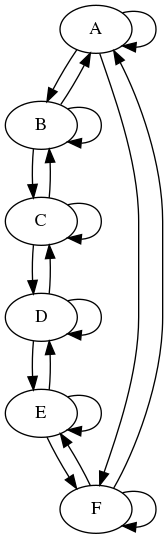

In [9]:
from IPython.display import Image
net.gvgraph('hifi.png')
Image(filename='hifi.png')

In [10]:
net.nodeTpm('A') # Note that B->A edge does not affect F output

A
AF     
00  0.0
10  1.0
01  1.0
11  0.0

In [11]:
net.nodeTpm('F')

F
EF     
00  0.0
10  1.0
01  1.0
11  0.0

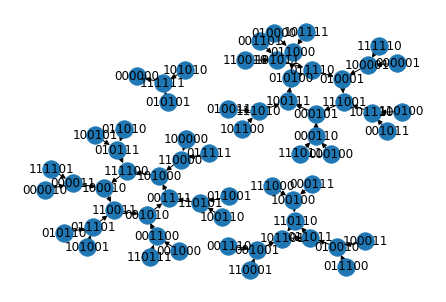

In [12]:
net.draw_states()

In [13]:
%time net.phi('000011')

CPU times: user 1.39 s, sys: 116 ms, total: 1.51 s
Wall time: 27.9 s


20.906248

In [14]:
exp.run()

Saved experiment with results to: /home/pothiers/phial/results_2020-05-19T10:48:53.115027.json


{'timestamp': '2020-05-19 10:34:19.764922',
 'duration': 873.350088177016,
 'results': {'000000': {'phi': 20.906248, 'elapsed_seconds': 27.1350198329892},
  '100010': {'phi': 20.906248, 'elapsed_seconds': 27.362008231226355},
  '010001': {'phi': 20.906248, 'elapsed_seconds': 27.09264347795397},
  '000101': {'phi': 20.906248, 'elapsed_seconds': 27.041699602967128},
  '010100': {'phi': 20.906248, 'elapsed_seconds': 27.820063499035314},
  '100111': {'phi': 20.906248, 'elapsed_seconds': 27.358481524977833},
  '000110': {'phi': 20.906248, 'elapsed_seconds': 27.37763502402231},
  '010111': {'phi': 20.906248, 'elapsed_seconds': 27.446154775097966},
  '110011': {'phi': 20.906248, 'elapsed_seconds': 27.418051460990682},
  '101110': {'phi': 20.906248, 'elapsed_seconds': 27.397691608872265},
  '100100': {'phi': 20.906248, 'elapsed_seconds': 27.904673716053367},
  '010010': {'phi': 20.906248, 'elapsed_seconds': 27.141064767958596},
  '111111': {'phi': 20.906248, 'elapsed_seconds': 27.1885696558747

In [15]:
exp.info()

{'timestamp': '2020-05-19 10:34:19.764922',
 'duration': 873.350088177016,
 'results': {'000000': {'phi': 20.906248, 'elapsed_seconds': 27.1350198329892},
  '100010': {'phi': 20.906248, 'elapsed_seconds': 27.362008231226355},
  '010001': {'phi': 20.906248, 'elapsed_seconds': 27.09264347795397},
  '000101': {'phi': 20.906248, 'elapsed_seconds': 27.041699602967128},
  '010100': {'phi': 20.906248, 'elapsed_seconds': 27.820063499035314},
  '100111': {'phi': 20.906248, 'elapsed_seconds': 27.358481524977833},
  '000110': {'phi': 20.906248, 'elapsed_seconds': 27.37763502402231},
  '010111': {'phi': 20.906248, 'elapsed_seconds': 27.446154775097966},
  '110011': {'phi': 20.906248, 'elapsed_seconds': 27.418051460990682},
  '101110': {'phi': 20.906248, 'elapsed_seconds': 27.397691608872265},
  '100100': {'phi': 20.906248, 'elapsed_seconds': 27.904673716053367},
  '010010': {'phi': 20.906248, 'elapsed_seconds': 27.141064767958596},
  '111111': {'phi': 20.906248, 'elapsed_seconds': 27.1885696558747

In [16]:
exp.net.to_json()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'tpm': [('000000', '000000'),
  ('100000', '110000'),
  ('010000', '011000'),
  ('110000', '101000'),
  ('001000', '001100'),
  ('101000', '111100'),
  ('011000', '010100'),
  ('111000', '100100'),
  ('000100', '000110'),
  ('100100', '110110'),
  ('010100', '011110'),
  ('110100', '101110'),
  ('001100', '001010'),
  ('101100', '111010'),
  ('011100', '010010'),
  ('111100', '100010'),
  ('000010', '000011'),
  ('100010', '110011'),
  ('010010', '011011'),
  ('110010', '101011'),
  ('001010', '001111'),
  ('101010', '111111'),
  ('011010', '010111'),
  ('111010', '100111'),
  ('000110', '000101'),
  ('100110', '110101'),
  ('010110', '011101'),
  ('110110', '101101'),
  ('001110', '001001'),
  ('101110', '111001'),
  ('011110'

In [17]:
net2 = tb.Net()
net2.from_json('../examples/hi-fi.json')

TypeError: 'str' object is not callable

In [ ]:
ls ../examples

In [ ]:
import pyphi.convert
import pandas as pd
tpm_sbs = pyphi.convert.state_by_node2state_by_state(tpm)
states = tb.all_states(len(net), backwards=True)
tpm_df = pd.DataFrame(tpm_sbs, index=states, columns=states)
tpm_df
S = nx.DiGraph(tpm_df)
nx.draw(S, pos=pydot_layout(S), with_labels=True)

In [ ]:
[i for i,j in S.edges() if i==j]

In [ ]:
len(exp.net.unreachable_states)

In [ ]:
len(exp.net.in_states)

In [ ]:
exp.net.out_states

In [ ]:
nx.number_weakly_connected_components(S)

In [ ]:
list(nx.simple_cycles(S))

In [ ]:
net.info()

In [ ]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')